In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
from matplotlib import colors
from datetime import datetime
from IPython.display import clear_output
%matplotlib nbagg
#%matplotlib inline

In [2]:
d = pd.read_csv("unpacked.txt",delimiter='\t',header=None)
channel = np.array(d[0])
edge = np.array(d[1])
time = np.array(d[2])

# Data Overview

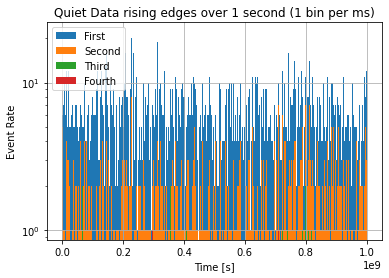

In [5]:
bns = 1*1000 # 1 second times 1000 ms to bin every ms
cn1=1
cn2=2
cn3=3
cn4=4
endTime=1e9 #1 second

pp.close()
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn1,edge==0),time<=endTime))],bins=bns,label="First", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn2,edge==0),time<=endTime))],bins=bns,label="Second", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn3,edge==0),time<=endTime))],bins=bns,label="Third", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn4,edge==0),time<=endTime))],bins=bns,label="Fourth", histtype="barstacked")
#pp.hist(time[channel==0],bins=bns,label="live time",histtype="step")
pp.yscale("log")
pp.legend(loc="upper left")
pp.xlabel("Time [s]")
pp.ylabel("Event Rate")
pp.title("Quiet Data rising edges over 1 second (1 bin per ms)")
pp.grid()
pp.show()

In [ ]:
pp.close()
bns = 6000 # bin every 10 ms over 1 minute
cn1=1
cn2=2
cn3=3
cn4=4
endTime=60*1e9 #1 min

pp.close()
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn2,edge==0),time<=endTime))],bins=bns,label="Second", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn3,edge==0),time<=endTime))],bins=bns,label="Third", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn4,edge==0),time<=endTime))],bins=bns,label="Fourth", histtype="barstacked")
#pp.hist(time[channel==0],bins=bns,label="live time",histtype="step")
pp.yscale("log")
pp.legend(loc="upper left")
pp.xlabel("Time [s]")
pp.ylabel("Event Rate")
pp.title("Quiet Data rising edges over 1 minute (1 bin per 2 ms)")
pp.grid()
pp.show()

<IPython.core.display.Javascript object>


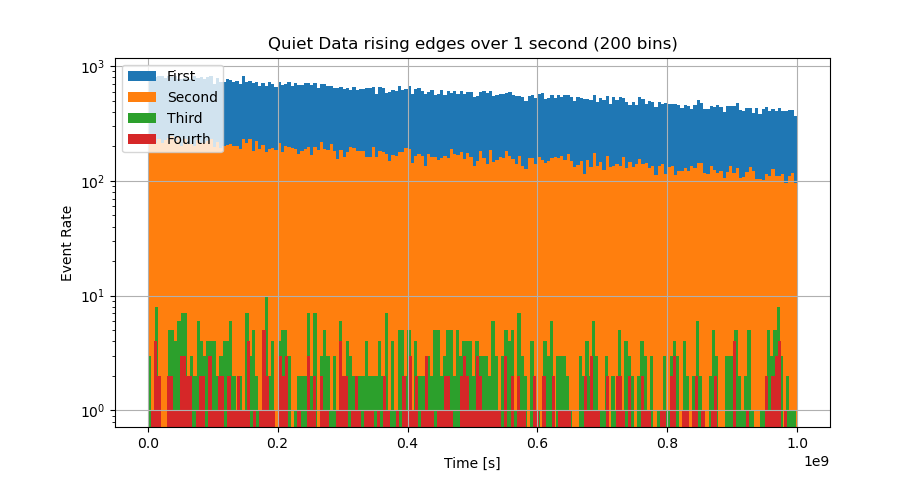

In [3]:
bns = 200 # bin every 5 ms
cn1=1
cn2=2
cn3=3
cn4=4
endTime=1e9 #1 second

pp.close()
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn1,edge==0),time<=endTime))],bins=bns,label="First", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn2,edge==0),time<=endTime))],bins=bns,label="Second", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn3,edge==0),time<=endTime))],bins=bns,label="Third", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn4,edge==0),time<=endTime))],bins=bns,label="Fourth", histtype="barstacked")
#pp.hist(time[channel==0],bins=bns,label="live time",histtype="step")
pp.yscale("log")
pp.legend(loc="upper left")
pp.xlabel("Time [s]")
pp.ylabel("Event Rate")
pp.title("Quiet Data rising edges over 1 second (200 bins)")
pp.grid()
pp.show()

<IPython.core.display.Javascript object>


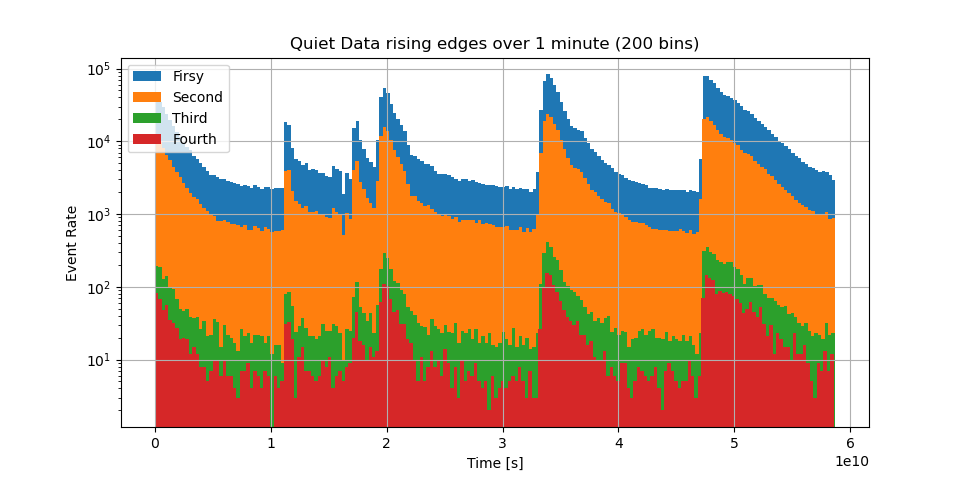

In [4]:
pp.close()
bns = 200 # bin every 300 ms
cn1=1
cn2=2
cn3=3
cn4=4
endTime=60*1e9 #1 min
#60463699912.9

pp.close()
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn1,edge==0),time<=endTime))],bins=bns,label="Firsy", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn2,edge==0),time<=endTime))],bins=bns,label="Second", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn3,edge==0),time<=endTime))],bins=bns,label="Third", histtype="barstacked")
pp.hist(time[np.where(np.logical_and(np.logical_and(channel==cn4,edge==0),time<=endTime))],bins=bns,label="Fourth", histtype="barstacked")
#pp.hist(time[channel==0],bins=bns,label="live time",histtype="step")
pp.yscale("log")
pp.legend(loc="upper left")
pp.xlabel("Time [s]")
pp.ylabel("Event Rate")
pp.title("Quiet Data rising edges over 1 minute (200 bins)")
pp.grid()
pp.show()

## Start Cutting 'n' hits per bin

<IPython.core.display.Javascript object>


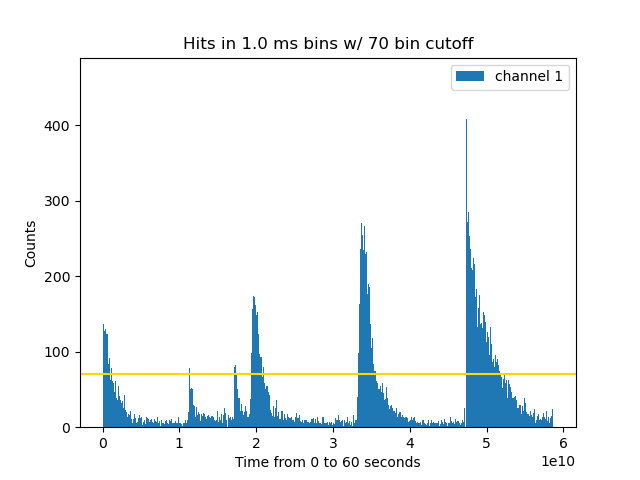

# bins
60000
# bins with low occurances
49502
# bins with more occurances
10191
# empty bins
307


In [11]:
# Set all setting here ##################################################################################
pp.close()
startTime = 0*1e9
endTime = 60*1e9
nBins = 60000
ti = endTime - startTime
ms = 1e6 # ms
binRate = round((ti/ms)/nBins,0)
cutOff =  70                           # hits per bin to partition
set_channel = 1                        # channel to pull threshold data from (up:1,2,3,4 down:6,7,8,9?)
colour = {                             # automaticaly chooses colour
    1 : 'tab:blue',
    2 : 'Orange',
    3 : 'Green',
    4 : 'Red',
}
col = colour[set_channel]              # overwrite colour here if you want

# Get counts of hits in each bin as well as a plot
counts, edges, plot = pp.hist(time[np.where(np.logical_and(np.logical_and(np.logical_and(channel==set_channel,edge==0),time<=endTime),time>=startTime))],bins=nBins,label="channel " + str(set_channel), histtype="barstacked", color = col)

pp.title("Hits in " + str(binRate) + " ms bins w/ " + str(cutOff) + " bin cutoff")
pp.xlabel("Time from 0 to 60 seconds")
pp.ylabel("Counts")
pp.legend(loc = 'upper right')
pp.axhline(cutOff, color = 'Gold') # SET LINE COLOUR HERE
pp.show()

lowOccuranceBins = []   # The following gets lists of bins with 1-cutOff hits and other, zero is used to count empty bins
otherBins = []
zeroBins = []
zero = 0
for _ in range(len(counts)):
    occ = counts[_]
    if (occ > 0 and occ <= cutOff):
        lowOccuranceBins.append([_*1e6 + startTime, occ])
    elif (occ == 0):
        zeroBins.append([_, occ])
        zero += 1
    else:
        otherBins.append([_, occ])

# Display results so tweaks can be made
print("# bins")
print(len(counts))
print("# bins with low occurances")
print(len(lowOccuranceBins))
print("# bins with more occurances")
print(len(otherBins))
print("# empty bins")
print(zero)
if( len(otherBins) == 0 ):
    highT = 0
    print("All Data below cutoff!")

In [5]:
pp.close()
print(lowOccuranceBins[0][0])    # show first bin
print(lowOccuranceBins[-1][0])   # show last bin

0.0
59999000000.0


In [12]:
lowTimeRanges = []
lenL = len(lowOccuranceBins)
display(lenL) # Number of arrays before
_ = 0

while _ < lenL:                                       # iterate over each index _ in lowOccuraceBins
    t = lowOccuranceBins[_][0]                        # save the first value as t
    z = 1
    while (_ + z < lenL): # make sure in range
        if(lowOccuranceBins[_ + z][0] == t + z*1000000): # if the next entry is suxxessive in time
            z += 1                                             # go to the next entry
        else:                                            
            break                                              # break if not successive
    lowTimeRanges.append([t, lowOccuranceBins[_ + z - 1][0] + 1000000])  # save start and end time values
    _ = _ + z                                                  # move the index to the next entry that is not succesive
    
display('VVVVV')
display(len(lowTimeRanges)) # Number of arrays after
print(lowTimeRanges)

49502

'VVVVV'

747

[[839000000.0, 840000000.0], [854000000.0, 855000000.0], [903000000.0, 904000000.0], [905000000.0, 906000000.0], [908000000.0, 909000000.0], [921000000.0, 922000000.0], [954000000.0, 955000000.0], [993000000.0, 994000000.0], [996000000.0, 997000000.0], [1003000000.0, 1004000000.0], [1009000000.0, 1010000000.0], [1018000000.0, 1020000000.0], [1026000000.0, 1027000000.0], [1029000000.0, 1030000000.0], [1034000000.0, 1035000000.0], [1040000000.0, 1041000000.0], [1048000000.0, 1050000000.0], [1054000000.0, 1055000000.0], [1058000000.0, 1059000000.0], [1062000000.0, 1064000000.0], [1065000000.0, 1066000000.0], [1068000000.0, 1069000000.0], [1072000000.0, 1074000000.0], [1076000000.0, 1078000000.0], [1079000000.0, 1080000000.0], [1090000000.0, 1091000000.0], [1095000000.0, 1096000000.0], [1103000000.0, 1105000000.0], [1112000000.0, 1113000000.0], [1115000000.0, 1118000000.0], [1121000000.0, 1122000000.0], [1123000000.0, 1125000000.0], [1127000000.0, 1129000000.0], [1135000000.0, 1137000000.0

In [13]:
def lowTimeBool(time, lowTimeRanges): #Returns true or false if that time is in the range
    for rang in lowTimeRanges:
        if( np.logical_and(time>=rang[0],time<rang[1])):
            #display(time)
            return True
    #display(time)
    return False

In [14]:
def lowTimeFile(time, lowTimeRanges, tmax = 60000000000.0,tmin = 0): #Sorts times in/out of rangeand returns 2 arrays
    # tmax and tmin are used for the % completion
    # for each time value in time, look and see if it falls within one of the lowTimeRanges
    # then save it to the corresponding array
    start = datetime.now()
    lowTimeArray = []
    otherTimeArray = []
    for _ in range(len(time)):
        val = False
        clear_output(wait=True)
        display(str(round((time[_]-tmin)*100 / (tmax-tmin), 3)) + " %")
        for rang in lowTimeRanges:
            if( np.logical_and( time[_] >= rang[0], time[_] < rang[1] ) ):
                val = True
        if(val):
            lowTimeArray.append(time[_])
        else:
            otherTimeArray.append(time[_])
    #lowTimeArray = np.array(lowTimeArray)     #uncomment if you need an np.array (better for memory maybe?)
    #otherTimeArray = np.array(otherTimeArray)
    end = datetime.now()
    print("DONE (∩｀-´)⊃━☆ﾟ.*･｡ﾟ " + str(end-start))
    return lowTimeArray, otherTimeArray

In [15]:
# This runs the above on set_channel
lowTimes, highTimes = lowTimeFile(time[np.logical_and(np.logical_and(np.logical_and(channel==set_channel,edge==0), time<=endTime),time>=startTime)], lowTimeRanges, endTime, startTime)
# change set_channel to 1-4 if you want to use one thresholds time ranges on another threshold
# only the firs ttwo arguments are necessary

'0.022 %'

KeyboardInterrupt: 

In [116]:
print(len(lowTimes))
print()
print(len(highTimes))
#print()
#print(lowTimes)
#print()
#print(highTimes)

271

3285


## Time Diff Between Consecutive

<IPython.core.display.Javascript object>


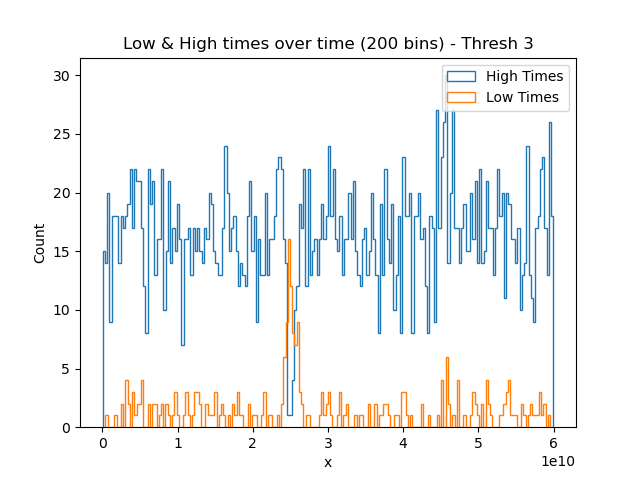

In [117]:
bns = 200
one_s_bins, *trash = np.histogram(lowTimes,bins=60)
#two_s_bins, *trash = np.histogram(highTimes,bins=60)

pp.close()
pp.hist(highTimes, bins = bns, label = "High Times", histtype = "step")
pp.hist(lowTimes, bins = bns, label = "Low Times", histtype = "step")
pp.legend()
pp.xlabel('x')
pp.ylabel("Count")
pp.title("Low & High times over time (" + str(bns)+" bins) - Thresh " + str(set_channel))
pp.show()

# Shows histogram of recorded hits in low/high times over the entire time

<IPython.core.display.Javascript object>


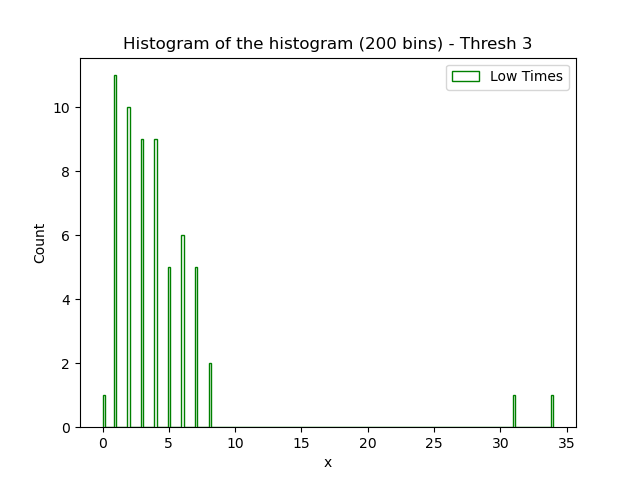

In [118]:
pp.close()
# Why are we taking a histogram of a histogram here, is it necessary (not for code)
pp.hist(one_s_bins, bins = bns, label = "Low Times", histtype = "step", color = col)
pp.legend()
pp.xlabel('x')
pp.ylabel("Count")
pp.title("Histogram of the histogram (" + str(bns)+" bins) - Thresh " + str(set_channel))
pp.show()
# This histogram was useful when we set the threshold between high/low time manualy

In [119]:
def getDiffs(tymes):
    # For each time given, find how long until the next time
    # Return it as an array of time differences
    diffs = []
    for _ in range(len(tymes) - 1):
        diffs.append(tymes[_+1] - tymes[_])
    return diffs

In [120]:
lowDiffs = getDiffs(lowTimes)
highDiffs = getDiffs(highTimes)
allDiffs = lowDiffs + highDiffs

In [121]:
display(len(lowDiffs))
display()
display(len(highTimes))

270

3285

<IPython.core.display.Javascript object>


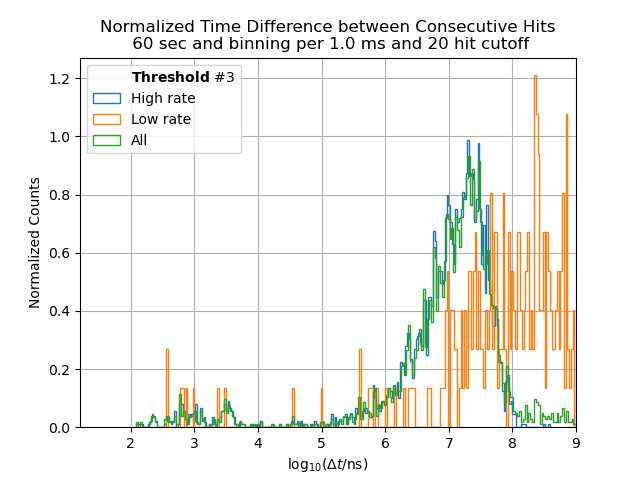

In [122]:
pp.close()
bns = 240
timeLength = int((endTime - startTime)*1e-9)
ax = pp.subplot(1,1,1)
ax.hist(np.log10(highDiffs), bins = bns, histtype = 'step', density = True, label = 'High rate')
ax.hist(np.log10(lowDiffs), bins = bns, histtype = 'step', density = True, label = 'Low rate')
ax.hist(np.log10(allDiffs), bins = bns, histtype = 'step', density = True, label = 'All')
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(1.2,9)            # Set range of X and Y
#ax.set_ylim(-0.05,0.8)
lab = " #" + str(set_channel)
ax.plot([], [], ' ', label="$\\bf{Threshold}$" + lab)
ax.legend(loc = 'upper left')
ax.set_ylabel("Normalized Counts")
ax.set_xlabel(r"$\mathrm{log}_{10} \left(\Delta t/\mathrm{ns}\right)$")
ax.set_title("Normalized Time Difference between Consecutive Hits\n " + str(timeLength) + " sec and binning per " + str(binRate) + " ms and " + str(cutOff) + " hit cutoff")
pp.show()

In [95]:
pp.close()